In [1]:
import pandas as pd
df = pd.read_csv('/content/car_sales.csv')
df.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4345 non-null   object 
 1   Price         4173 non-null   float64
 2   Body          4345 non-null   object 
 3   Mileage       4345 non-null   int64  
 4   EngineV       4195 non-null   float64
 5   Engine Type   4345 non-null   object 
 6   Registration  4345 non-null   object 
 7   Year          4345 non-null   int64  
 8   Model         4345 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB


In [4]:
df.describe()

,Price,Mileage,EngineV,Year
count,4173.000000,4345.000000,4195.000000,4345.000000
mean,19418.746935,161.237284,2.790734,2006.550058
std,25584.242620,105.705797,5.066437,6.719097
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,86.000000,1.800000,2003.000000
50%,11500.000000,155.000000,2.200000,2008.000000
75%,21700.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


In [6]:
df.isnull().sum()

,0
Brand,0
Price,172
Body,0
Mileage,0
EngineV,150
Engine Type,0
Registration,0
Year,0
Model,0


In [7]:
df.dropna(inplace=True)

In [8]:
df.isnull().sum()

,0
Brand,0
Price,0
Body,0
Mileage,0
EngineV,0
Engine Type,0
Registration,0
Year,0
Model,0


In [9]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ","_")
df.head()

,brand,price,body,mileage,enginev,engine_type,registration,year,model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [11]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['mileage'] = pd.to_numeric(df['mileage'], errors='coerce')
df['enginev'] = pd.to_numeric(df['enginev'], errors='coerce')

df.dropna(inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4025 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         4025 non-null   object 
 1   price         4025 non-null   float64
 2   body          4025 non-null   object 
 3   mileage       4025 non-null   int64  
 4   enginev       4025 non-null   float64
 5   engine_type   4025 non-null   object 
 6   registration  4025 non-null   object 
 7   year          4025 non-null   int64  
 8   model         4025 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 314.5+ KB


In [14]:
price_by_year= df.groupby('year')['price'].mean()

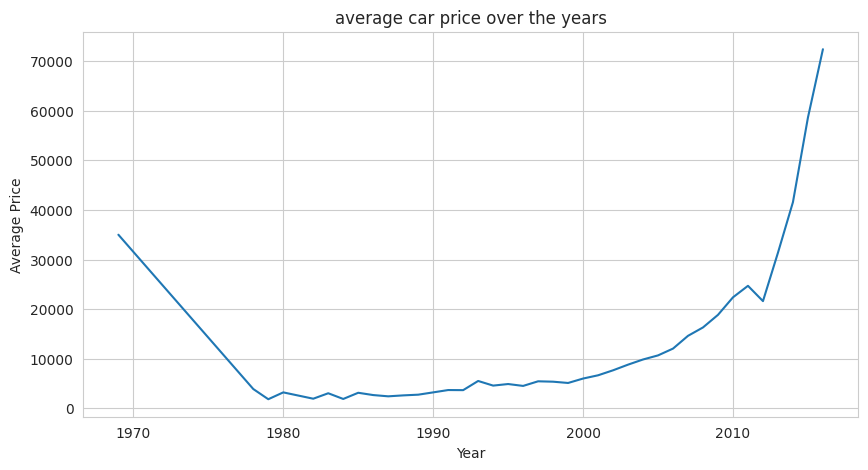

In [15]:
plt.figure(figsize=(10,5))
price_by_year.plot()
plt.title('average car price over the years')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.show()


In [17]:
brand_cars = df['brand'].value_counts().head(10)
brand_cars

,count
brand,
Volkswagen,880
Mercedes-Benz,823
BMW,640
Toyota,510
Renault,445
Audi,420
Mitsubishi,307


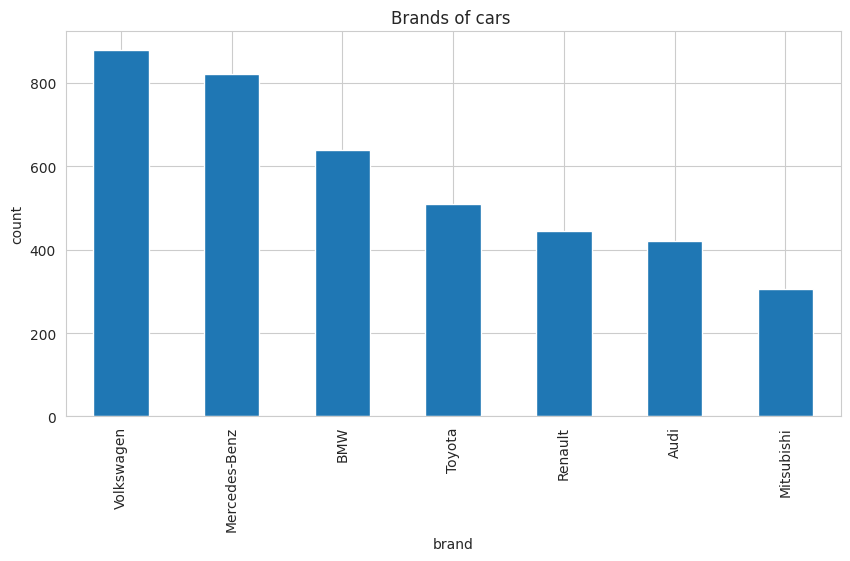

In [18]:
plt.figure(figsize=(10,5))
brand_cars.plot(kind='bar')
plt.title('Brands of cars ')
plt.xlabel('brand')
plt.ylabel('count')
plt.show()

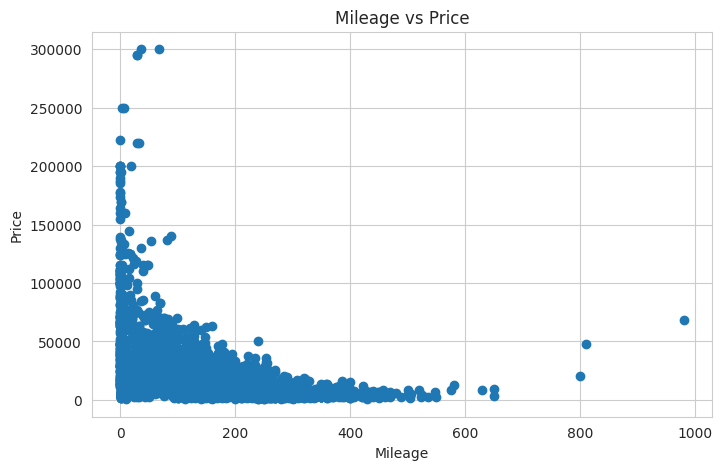

In [19]:
plt.figure(figsize=(8,5))
plt.scatter(df['mileage'], df['price'])
plt.title("Mileage vs Price")
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.show()

In [20]:
print("Most common brand:", df['brand'].value_counts().idxmax())
print("Year with highest average price:", price_by_year.idxmax())

Most common brand: Volkswagen
Year with highest average price: 2016
